In [1]:
%cd /content/drive/MyDrive/odev_2

/content/drive/MyDrive/odev_2


In [2]:
%ls

data/                     hold_out_training.ipynb  __pycache__/
dataset_operations.ipynb  k_fold_training.ipynb    scores/
figures/                  models/


In [ ]:
import os
from tqdm import tqdm
import cv2
import numpy as np

# Verinin X ve Y olarak ayrılması

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf

labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

X = []
Y = []
X_flatten = []

image_size = 256

for i in labels:
    folderPath = os.path.join('data', 'Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        X_flatten.append(img.flatten())
        Y.append(i)

for i in labels:
    folderPath = os.path.join('data', 'Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X.append(img)
        X_flatten.append(img.flatten())
        Y.append(i)
y_new = []

for i in Y:
    y_new.append(labels.index(i))
Y = y_new
Y = tf.keras.utils.to_categorical(Y)


np.save('data/X.npy', X)
np.save('data/Y.npy', Y)
np.save('data/X_flatten.npy', X_flatten)



100%|██████████| 74/74 [00:17<00:00,  4.17it/s]


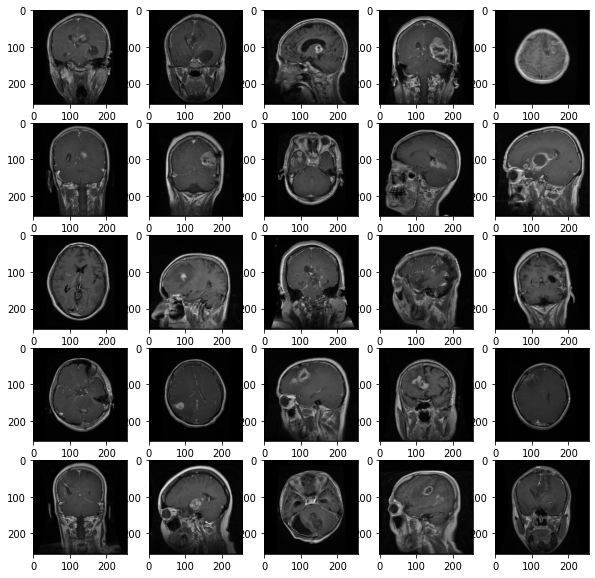

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
X = np.load('data/X.npy')

plt.figure(figsize=(10,10)) 

for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(X[i])

plt.show()